In [1]:
from torch.autograd import Function
from torch.autograd import Variable as V
import torch as t
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython import display
from sklearn.preprocessing import StandardScaler

In [2]:
#vfogd_pf
class linear_regression_fractional(Function):
    def forward(c,w,x,b):
        c.save_for_backward(w,x)
        output = w * x + b
        return output
    
    def backward(c,grad_output):
        w,x = c.saved_tensors
        #w
        if w<0:
            grad_w = grad_output*x  #1-order
        else:
            grad_w = grad_output*x*math.gamma(2)*w**(1-r)/math.gamma(2-r)  #fractional-order
        #b
        if b<0:
            grad_b = grad_output*1   #1-order
        else:
            grad_b = grad_output*math.gamma(2)*b**(1-r)/math.gamma(2-r)  #fractional-order
        #x
        grad_x = grad_output*w*x  #1-order
        return grad_w,grad_b,grad_x

In [3]:
t.manual_seed(1000) 

#random(x,y),y = 2*x**2 - 3 + e
def get_fake_data(batch_size=200):
    x = t.linspace(-10,10,steps=batch_size).view(-1,1)
    y = 2*x**2 - 3 + t.normal(0,10,size=(batch_size, 1))
    return x, y

In [34]:
r = 0.2
# random w,b
w = V(t.ones_like(t.rand(1,1)), requires_grad=True)
b = V(t.ones_like(t.rand(1,1)), requires_grad=True)

w_best = t.ones_like(w)
b_best = t.ones_like(b)
L_best = 10000

#L_8_9=[]
#L_7_8=[]
#L_6_3=[]
#L_5_3=[]
#L_4_2=[]
#L_3_4=[]
#L_2_8=[]
#L_2_2=[]
#L_1_8=[]
#L_1_4=[]
#L_1_0=[]
#L_0_6=[]
L_0_2=[]

lr =0.01 # 学习率

for ii in range(1000):
    x, y = get_fake_data()
    x, y = V(x), V(y)

    scaler = StandardScaler()
    x = t.tensor(scaler.fit_transform(x))
    y = t.tensor(scaler.fit_transform(y))
    
    y_pred = linear_regression_fractional.apply(w,x**2,b)
    #y_pred = advanced_linear_regression_fractional.apply(w,x**2,b)
    loss = 0.5 * (y - y_pred)** 2
    loss = loss.mean() 
    
    if loss.detach()<L_best:
        L_best = loss.detach()
        w_best = w.data
        b_best = b.data
    
    #L_8_9.append(loss.detach())
    #L_7_8.append(loss.detach())
    #L_6_3.append(loss.detach())
    #L_5_3.append(loss.detach())
    #L_4_2.append(loss.detach())
    #L_3_4.append(loss.detach())
    #L_2_8.append(loss.detach())
    #L_2_2.append(loss.detach())
    #L_1_8.append(loss.detach())
    #L_1_4.append(loss.detach())
    #L_1_0.append(loss.detach())
    #L_0_6.append(loss.detach())
    L_0_2.append(loss.detach())

    loss.backward()
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    #print(w.data,b.data)
    # 梯度清零
    
    w.grad.data.zero_()
    b.grad.data.zero_()

'\n    if ii%50 ==0:\n        display.clear_output(wait=True)\n        plt.figure(figsize=(10,6),dpi=300)\n        x11 = t.linspace(-10,10,steps=200).view(-1,1)\n        x_s = x11**2\n        y11 = x_s.mm(w.data) + b.data.expand_as(x11)\n        x11 = scaler.fit_transform(x11.numpy())\n        y11 = scaler.fit_transform(y11.numpy())\n        plt.plot(x11,y11,color="red") # predicted\n        \n        x_2, y_2 = get_fake_data(batch_size=200) \n        x_2 = scaler.fit_transform(x_2.numpy())\n        y_2 = scaler.fit_transform(y_2.numpy())\n        plt.scatter(x_2, y_2,s=10) # true data\n         \n        plt.show()\n        plt.pause(2)\n'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


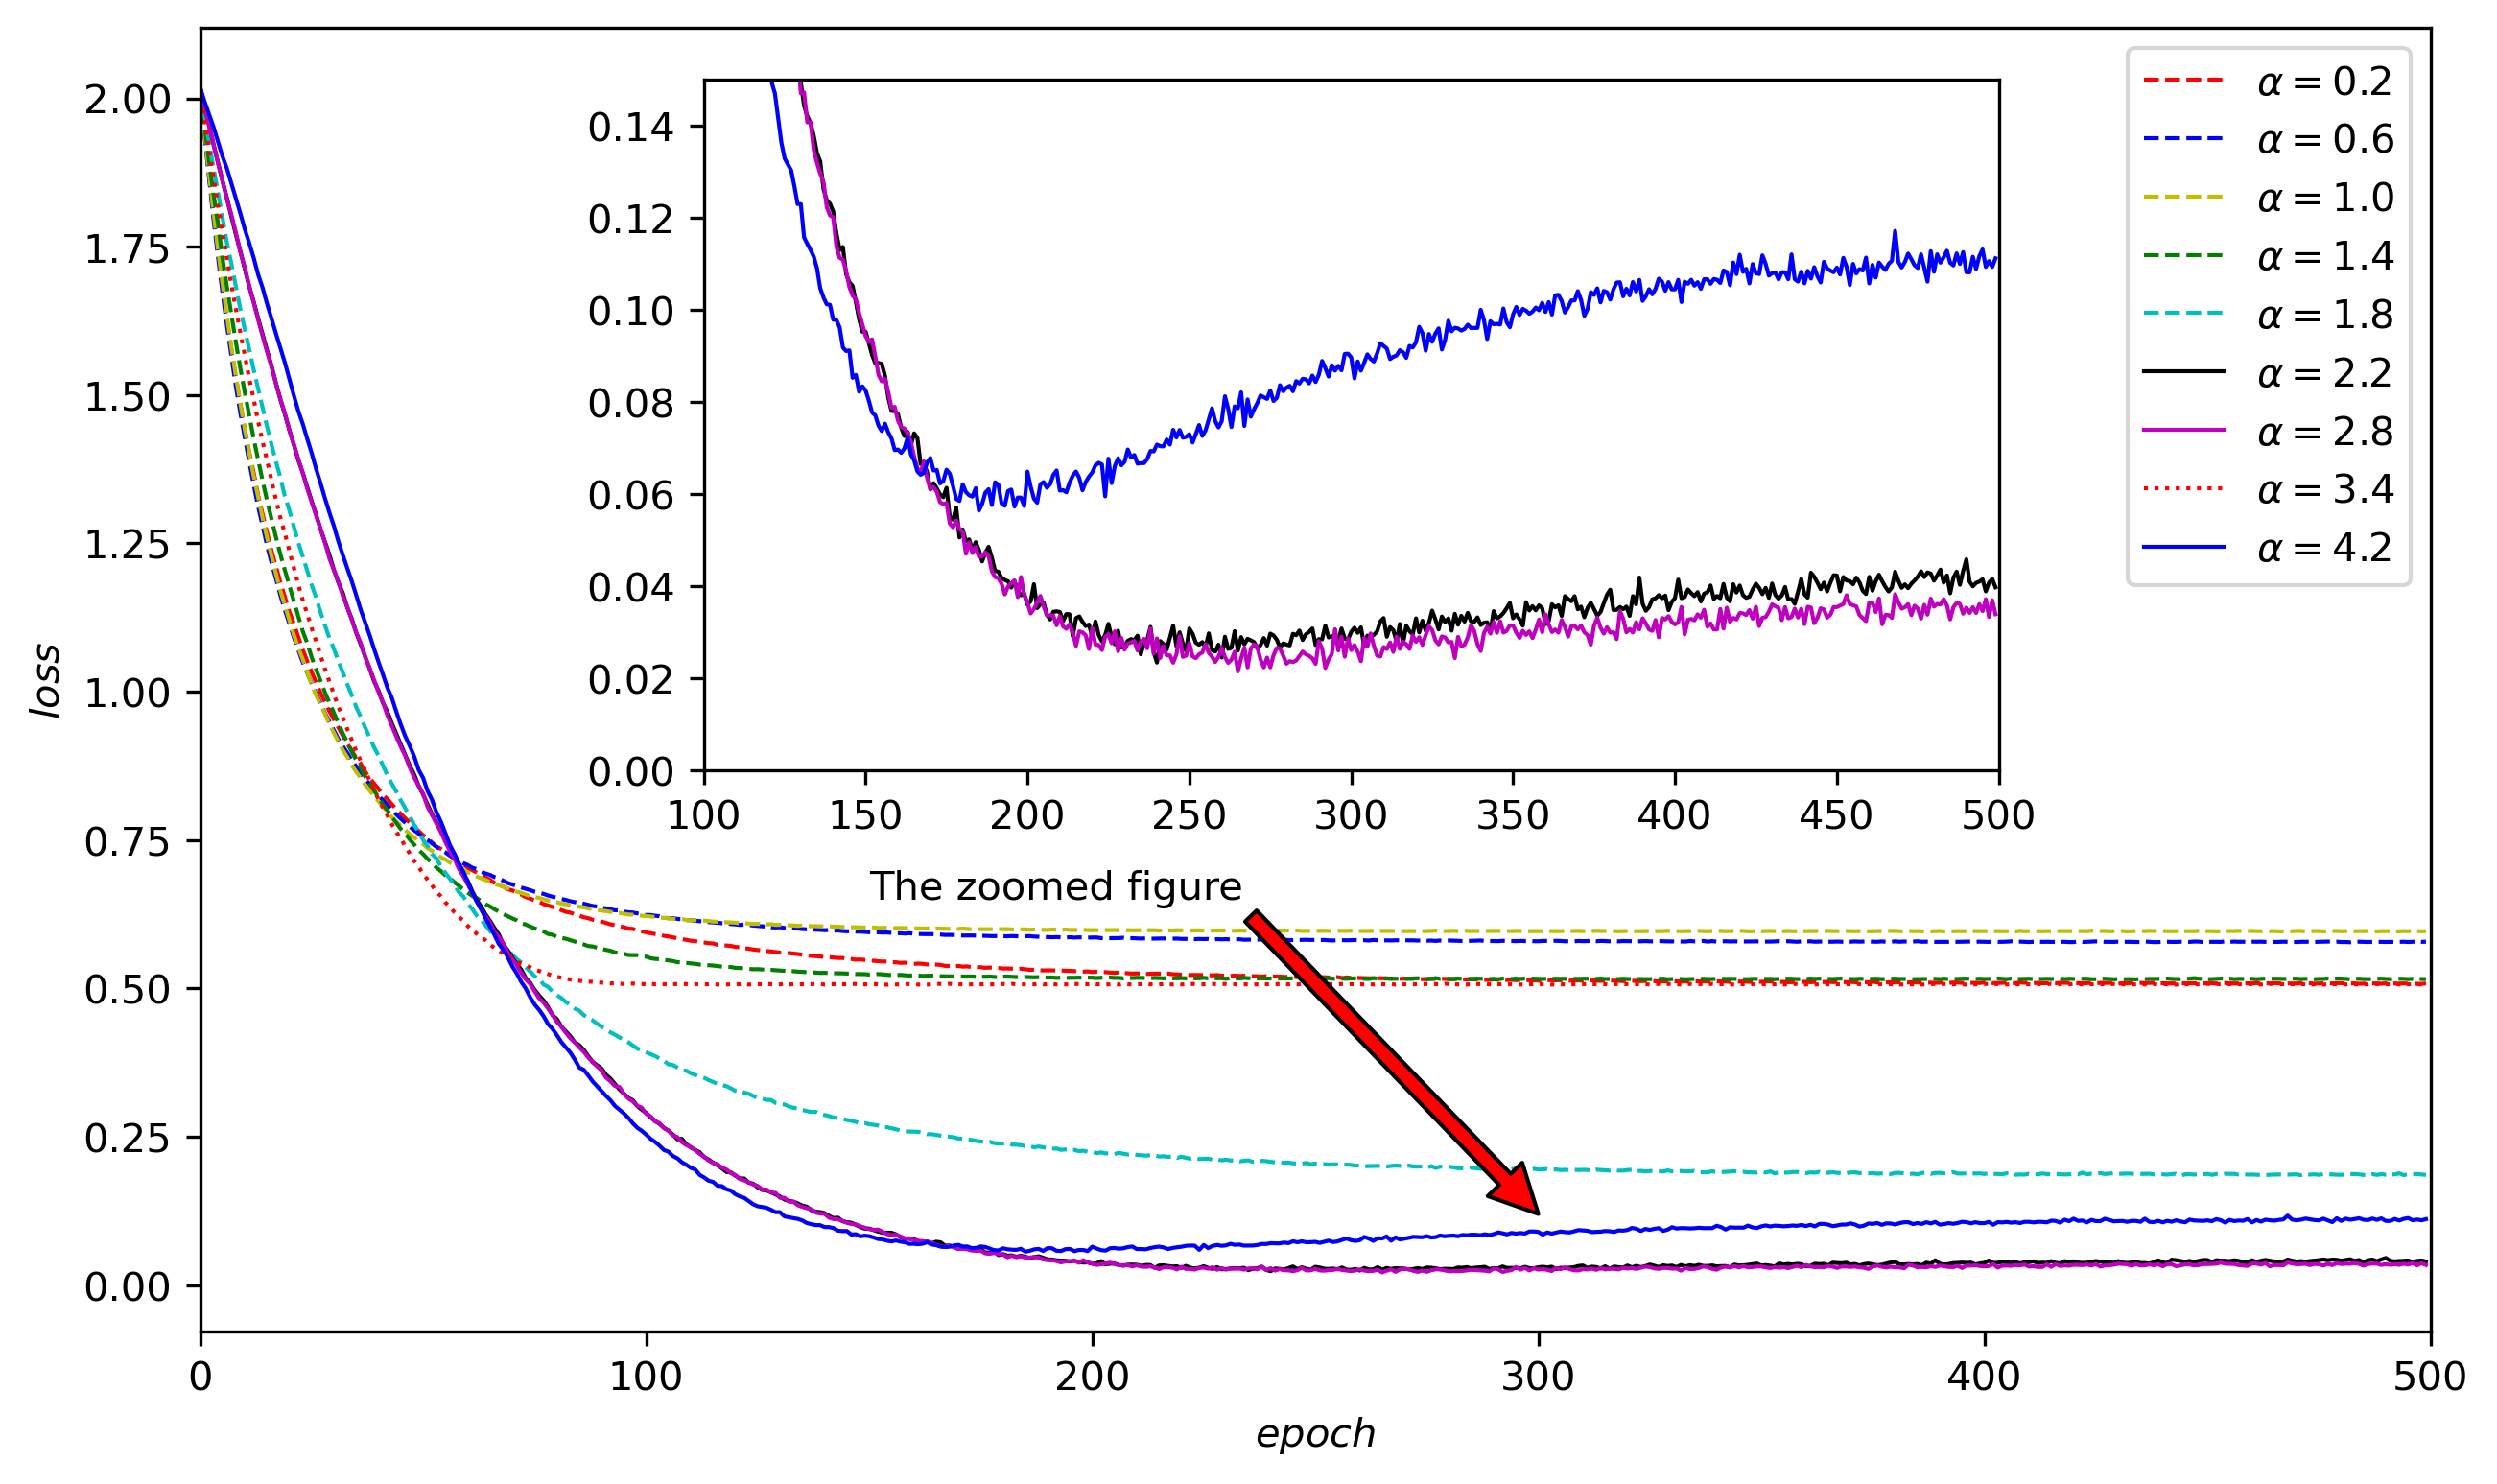

In [611]:
#fig5
fig = plt.figure(figsize=(10,6),dpi=300)
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(L_0_2[0:500],'r--',label=r'$\alpha=0.2$',markersize='1',linewidth ='1')  #marker will make the figure vague.
ax1.plot(L_0_6[0:500],'b--',label=r'$\alpha=0.6$',markersize='1',linewidth ='1')
ax1.plot(L_1_0[0:500],'y--',label=r'$\alpha=1.0$',markersize='1',linewidth ='1')
ax1.plot(L_1_4[0:500],'g--',label=r'$\alpha=1.4$',markersize='1',linewidth ='1')
ax1.plot(L_1_8[0:500],'c--',label=r'$\alpha=1.8$',markersize='1',linewidth ='1')
ax1.plot(L_2_2[0:500],'k-',label=r'$\alpha=2.2$',markersize='1',linewidth ='1')
ax1.plot(L_2_8[0:500],'m-',label=r'$\alpha=2.8$',markersize='1',linewidth ='1')
ax1.plot(L_3_4[0:500],'r:',label=r'$\alpha=3.4$',markersize='1',linewidth ='1')
ax1.plot(L_4_2[0:500],'b-',label=r'$\alpha=4.2$',markersize='1',linewidth ='1')
#ax1.plot(L_5_3[0:500],label='alpha=5.3')
#ax1.plot(L_6_3[0:500],'y-.>',label='alpha=6.3',markersize='1',linewidth ='1')
#ax1.plot(L_7_8[0:500],label='alpha=7.8')
#ax1.plot(L_8_9[0:500],label='alpha=8.9')
ax1.annotate(r'The zoomed figure', xy=(300,0.12), xytext=(150,0.65),arrowprops=dict(facecolor='red'))
ax1.set_xlim(0,500)
ax1.set_xlabel(r'$epoch$')
ax1.set_ylabel(r'$loss$')
ax1.legend()

left, bottom, width, height = 0.3,0.45,0.45,0.4
ax2 = fig.add_axes([left,bottom,width,height])
ax2.plot(L_0_2[0:500],'r--',label='alpha=0.2',markersize='1',linewidth ='1')  #marker will make the figure vague.
ax2.plot(L_0_6[0:500],'b--',label='alpha=0.6',markersize='1',linewidth ='1')
ax2.plot(L_1_0[0:500],'y--',label='alpha=1.0',markersize='1',linewidth ='1')
ax2.plot(L_1_4[0:500],'g--',label='alpha=1.4',markersize='1',linewidth ='1')
ax2.plot(L_1_8[0:500],'c--',label='alpha=1.8',markersize='1',linewidth ='1')
ax2.plot(L_2_2[0:500],'k-',label='alpha=2.2',markersize='1',linewidth ='1')
ax2.plot(L_2_8[0:500],'m-',label='alpha=2.8',markersize='1',linewidth ='1')
ax2.plot(L_3_4[0:500],'r:',label='alpha=3.4',markersize='1',linewidth ='1')
ax2.plot(L_4_2[0:500],'b-',label='alpha=4.2',markersize='1',linewidth ='1')
ax2.set_xlim(100,500)
ax2.set_ylim(0,0.15)

plt.savefig('picture/Fig5.eps',bbox_inches='tight',format='eps')
plt.savefig('picture/Fig5.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/Fig5.pdf',bbox_inches='tight',format='pdf')
plt.show()

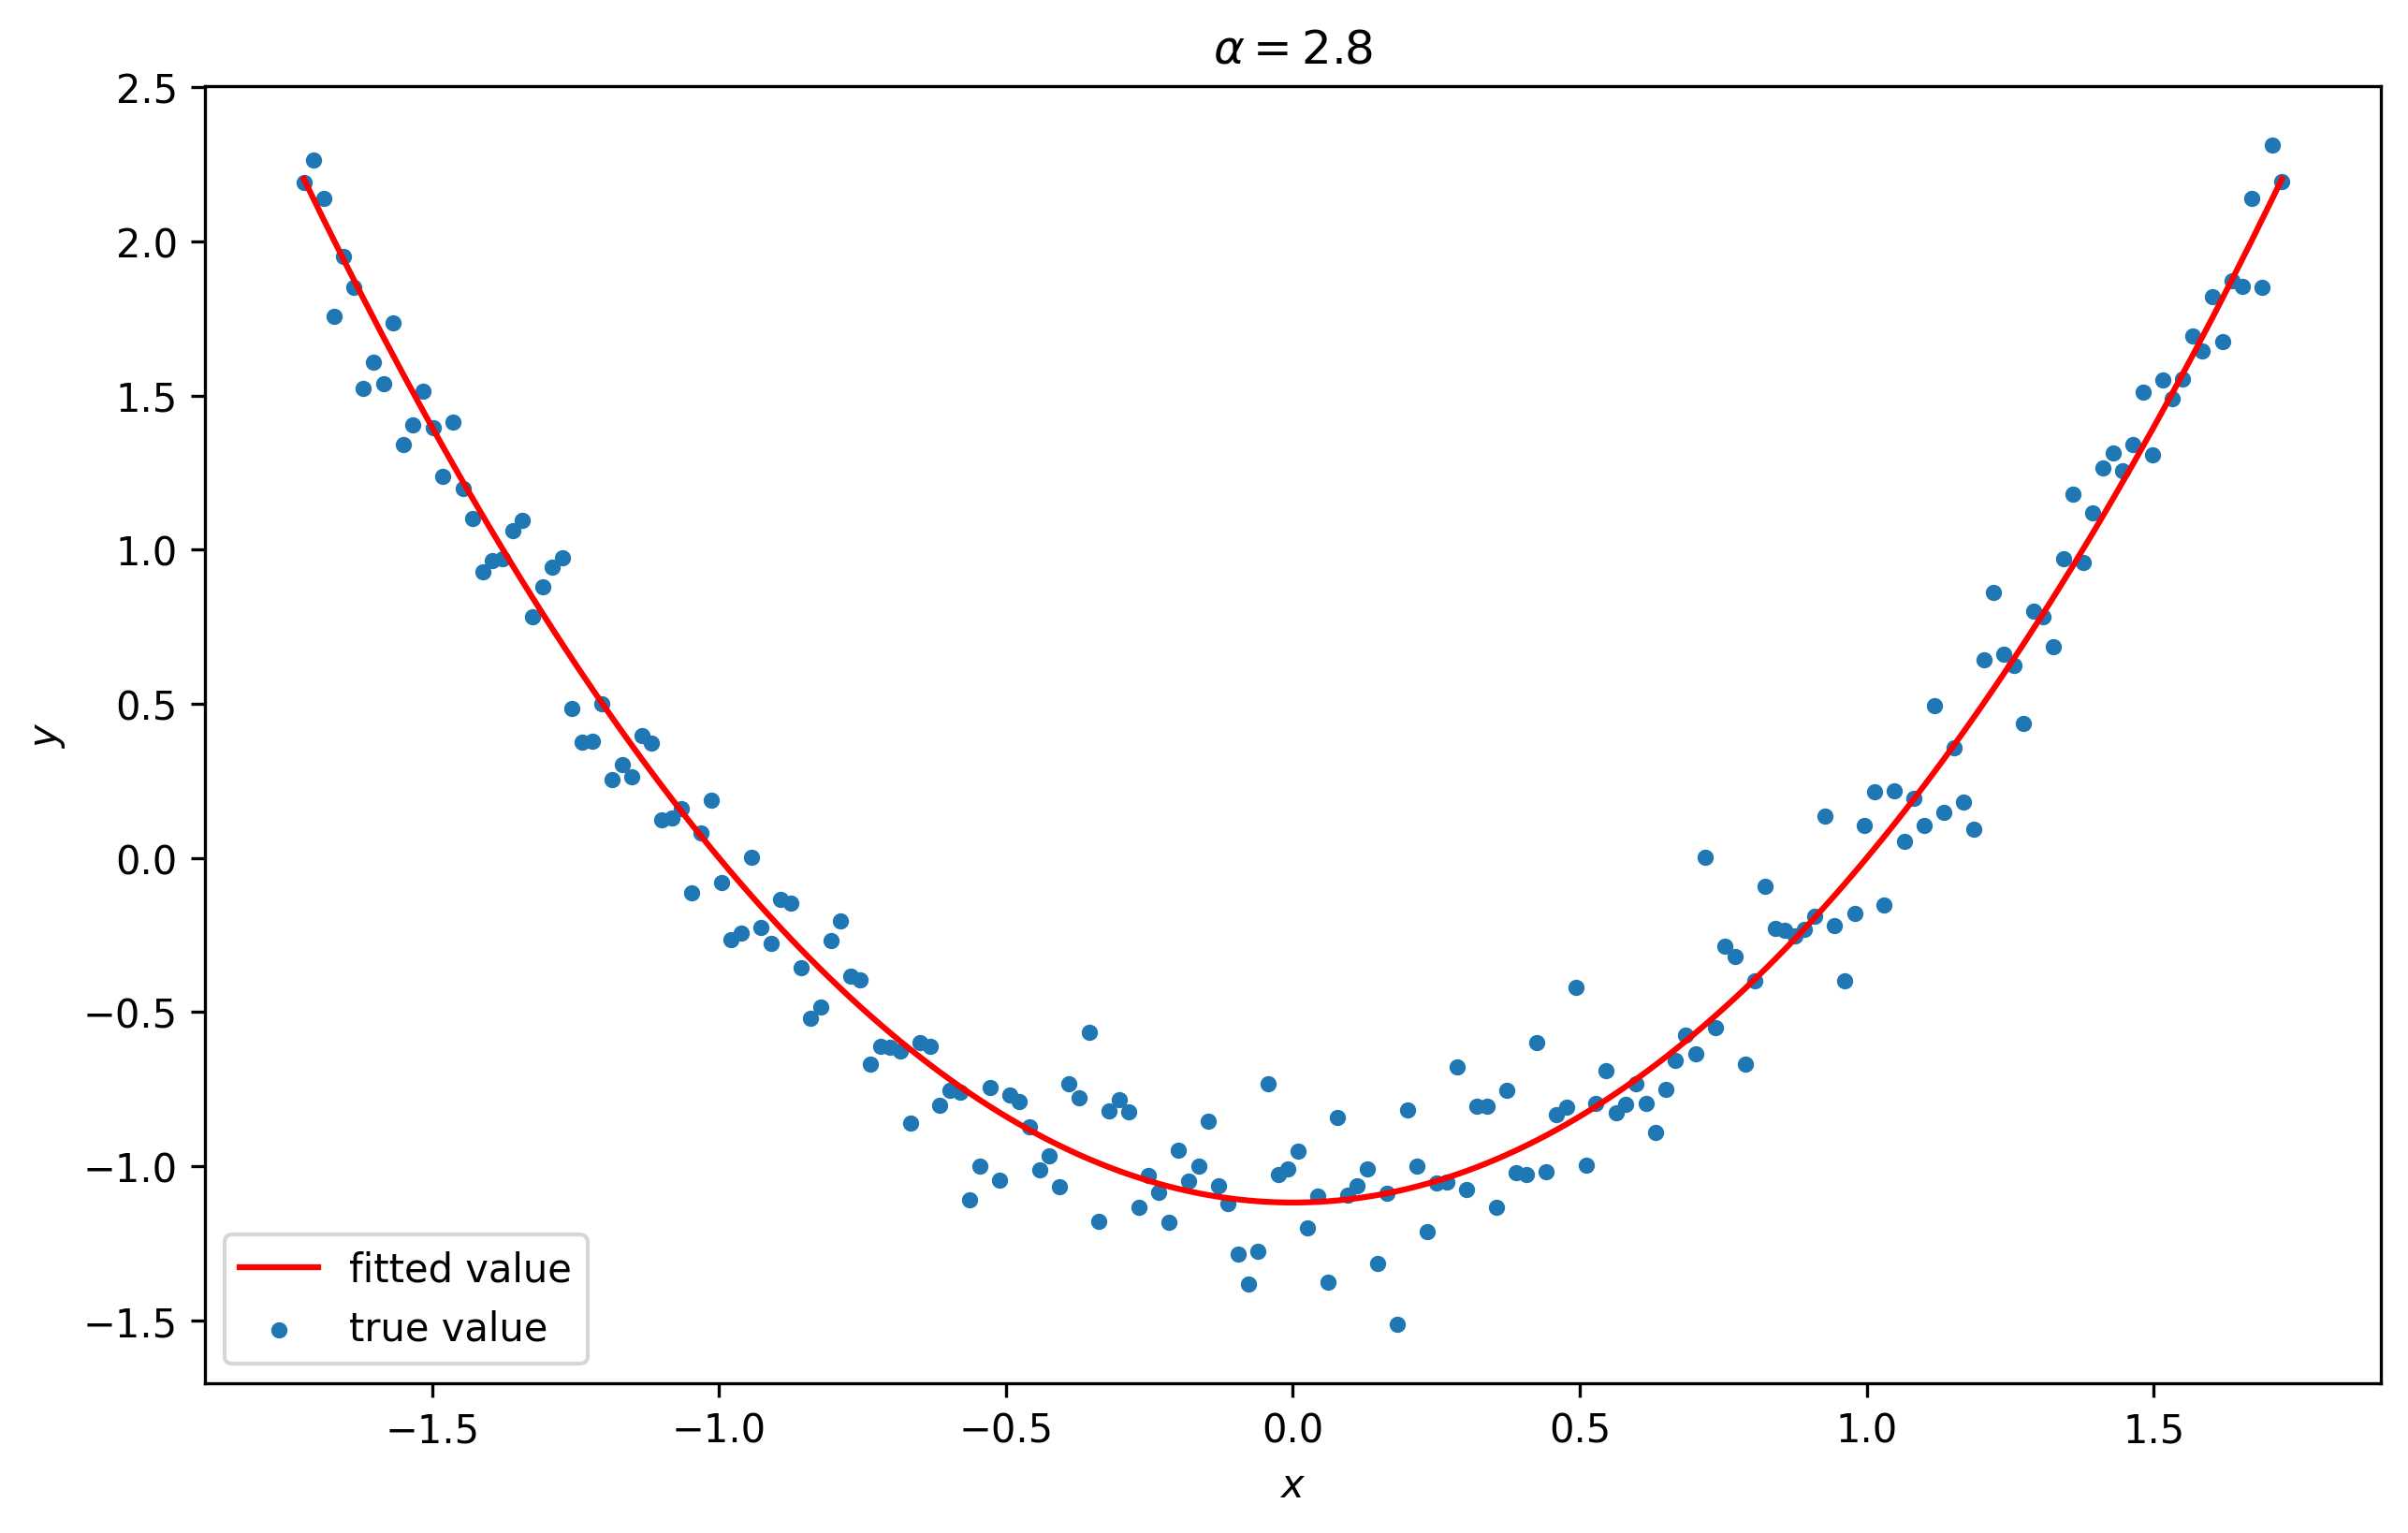

In [16]:
#fig6
fig = plt.figure(figsize=(10,6),dpi=300)
ax1 = fig.add_subplot(111)
x11 = t.linspace(-10,10,steps=200).view(-1,1)
x_s = x11**2

y11 = x_s.mm(w_best.data) + b_best.data.expand_as(x11)
x11 = scaler.fit_transform(x11.numpy())
y11 = scaler.fit_transform(y11.numpy())
ax1.plot(x11,y11,color="red",label='fitted value')  #prediction
       
x_2, y_2 = get_fake_data(batch_size=200) 
x_2 = scaler.fit_transform(x_2.numpy())
y_2 = scaler.fit_transform(y_2.numpy())
ax1.scatter(x_2, y_2,s=10,label='true value') # true data
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_title(r'$\alpha  = 2.8$')
ax1.legend()

plt.savefig('picture/Fig6.eps',bbox_inches='tight',format='eps')
plt.savefig('picture/Fig6.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/Fig6.pdf',bbox_inches='tight',format='pdf')
plt.show()


In [710]:
L_0_2_best,L_0_6_best,L_1_0_best,L_1_4_best,L_1_8_best,L_2_2_best,L_2_8_best,L_3_4_best,L_4_2_best = 1000,1000,1000,1000,1000,1000,1000,1000,1000
for h in range(1000):
    if L_0_2[h] < L_0_2_best:
        L_0_2_best = L_0_2[h]
    if L_0_6[h] < L_0_6_best:
        L_0_6_best = L_0_6[h]  
    if L_1_0[h] < L_1_0_best:
        L_1_0_best = L_1_0[h]
    if L_1_4[h] < L_1_4_best:
        L_1_4_best = L_1_4[h]
    if L_1_8[h] < L_1_8_best:
        L_1_8_best = L_1_8[h]
    if L_2_2[h] < L_2_2_best:
        L_2_2_best = L_2_2[h]
    if L_2_8[h] < L_2_8_best:
        L_2_8_best = L_2_8[h]
    if L_3_4[h] < L_3_4_best:
        L_3_4_best = L_3_4[h]
    if L_4_2[h] < L_4_2_best:
        L_4_2_best = L_4_2[h]
print('L_0_2_best:',L_0_2_best)
print('L_0_6_best:',L_0_6_best)
print('L_1_0_best:',L_1_0_best)
print('L_1_4_best:',L_1_4_best)
print('L_1_8_best:',L_1_8_best)
print('L_2_2_best:',L_2_2_best)
print('L_2_8_best:',L_2_8_best)
print('L_3_4_best:',L_3_4_best)
print('L_4_2_best:',L_4_2_best)

L_0_2_best: tensor(0.5063, dtype=torch.float64)
L_0_6_best: tensor(0.5775, dtype=torch.float64)
L_1_0_best: tensor(0.5957, dtype=torch.float64)
L_1_4_best: tensor(0.5151, dtype=torch.float64)
L_1_8_best: tensor(0.1833, dtype=torch.float64)
L_2_2_best: tensor(0.0248, dtype=torch.float64)
L_2_8_best: tensor(0.0221, dtype=torch.float64)
L_3_4_best: tensor(0.5062, dtype=torch.float64)
L_4_2_best: tensor(0.0566, dtype=torch.float64)


In [17]:
L_x = [0.2,0.6,1.0,1.4,1.8,2.2,2.8,3.4,4.2]
L_y = [0.5063,0.5775,0.5957,0.5151,0.1833,0.0248,0.0221,0.5062,0.0566]

C:\Users\zxj\AppData\Local\Temp\ipykernel_25808\454812338.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(L_x)


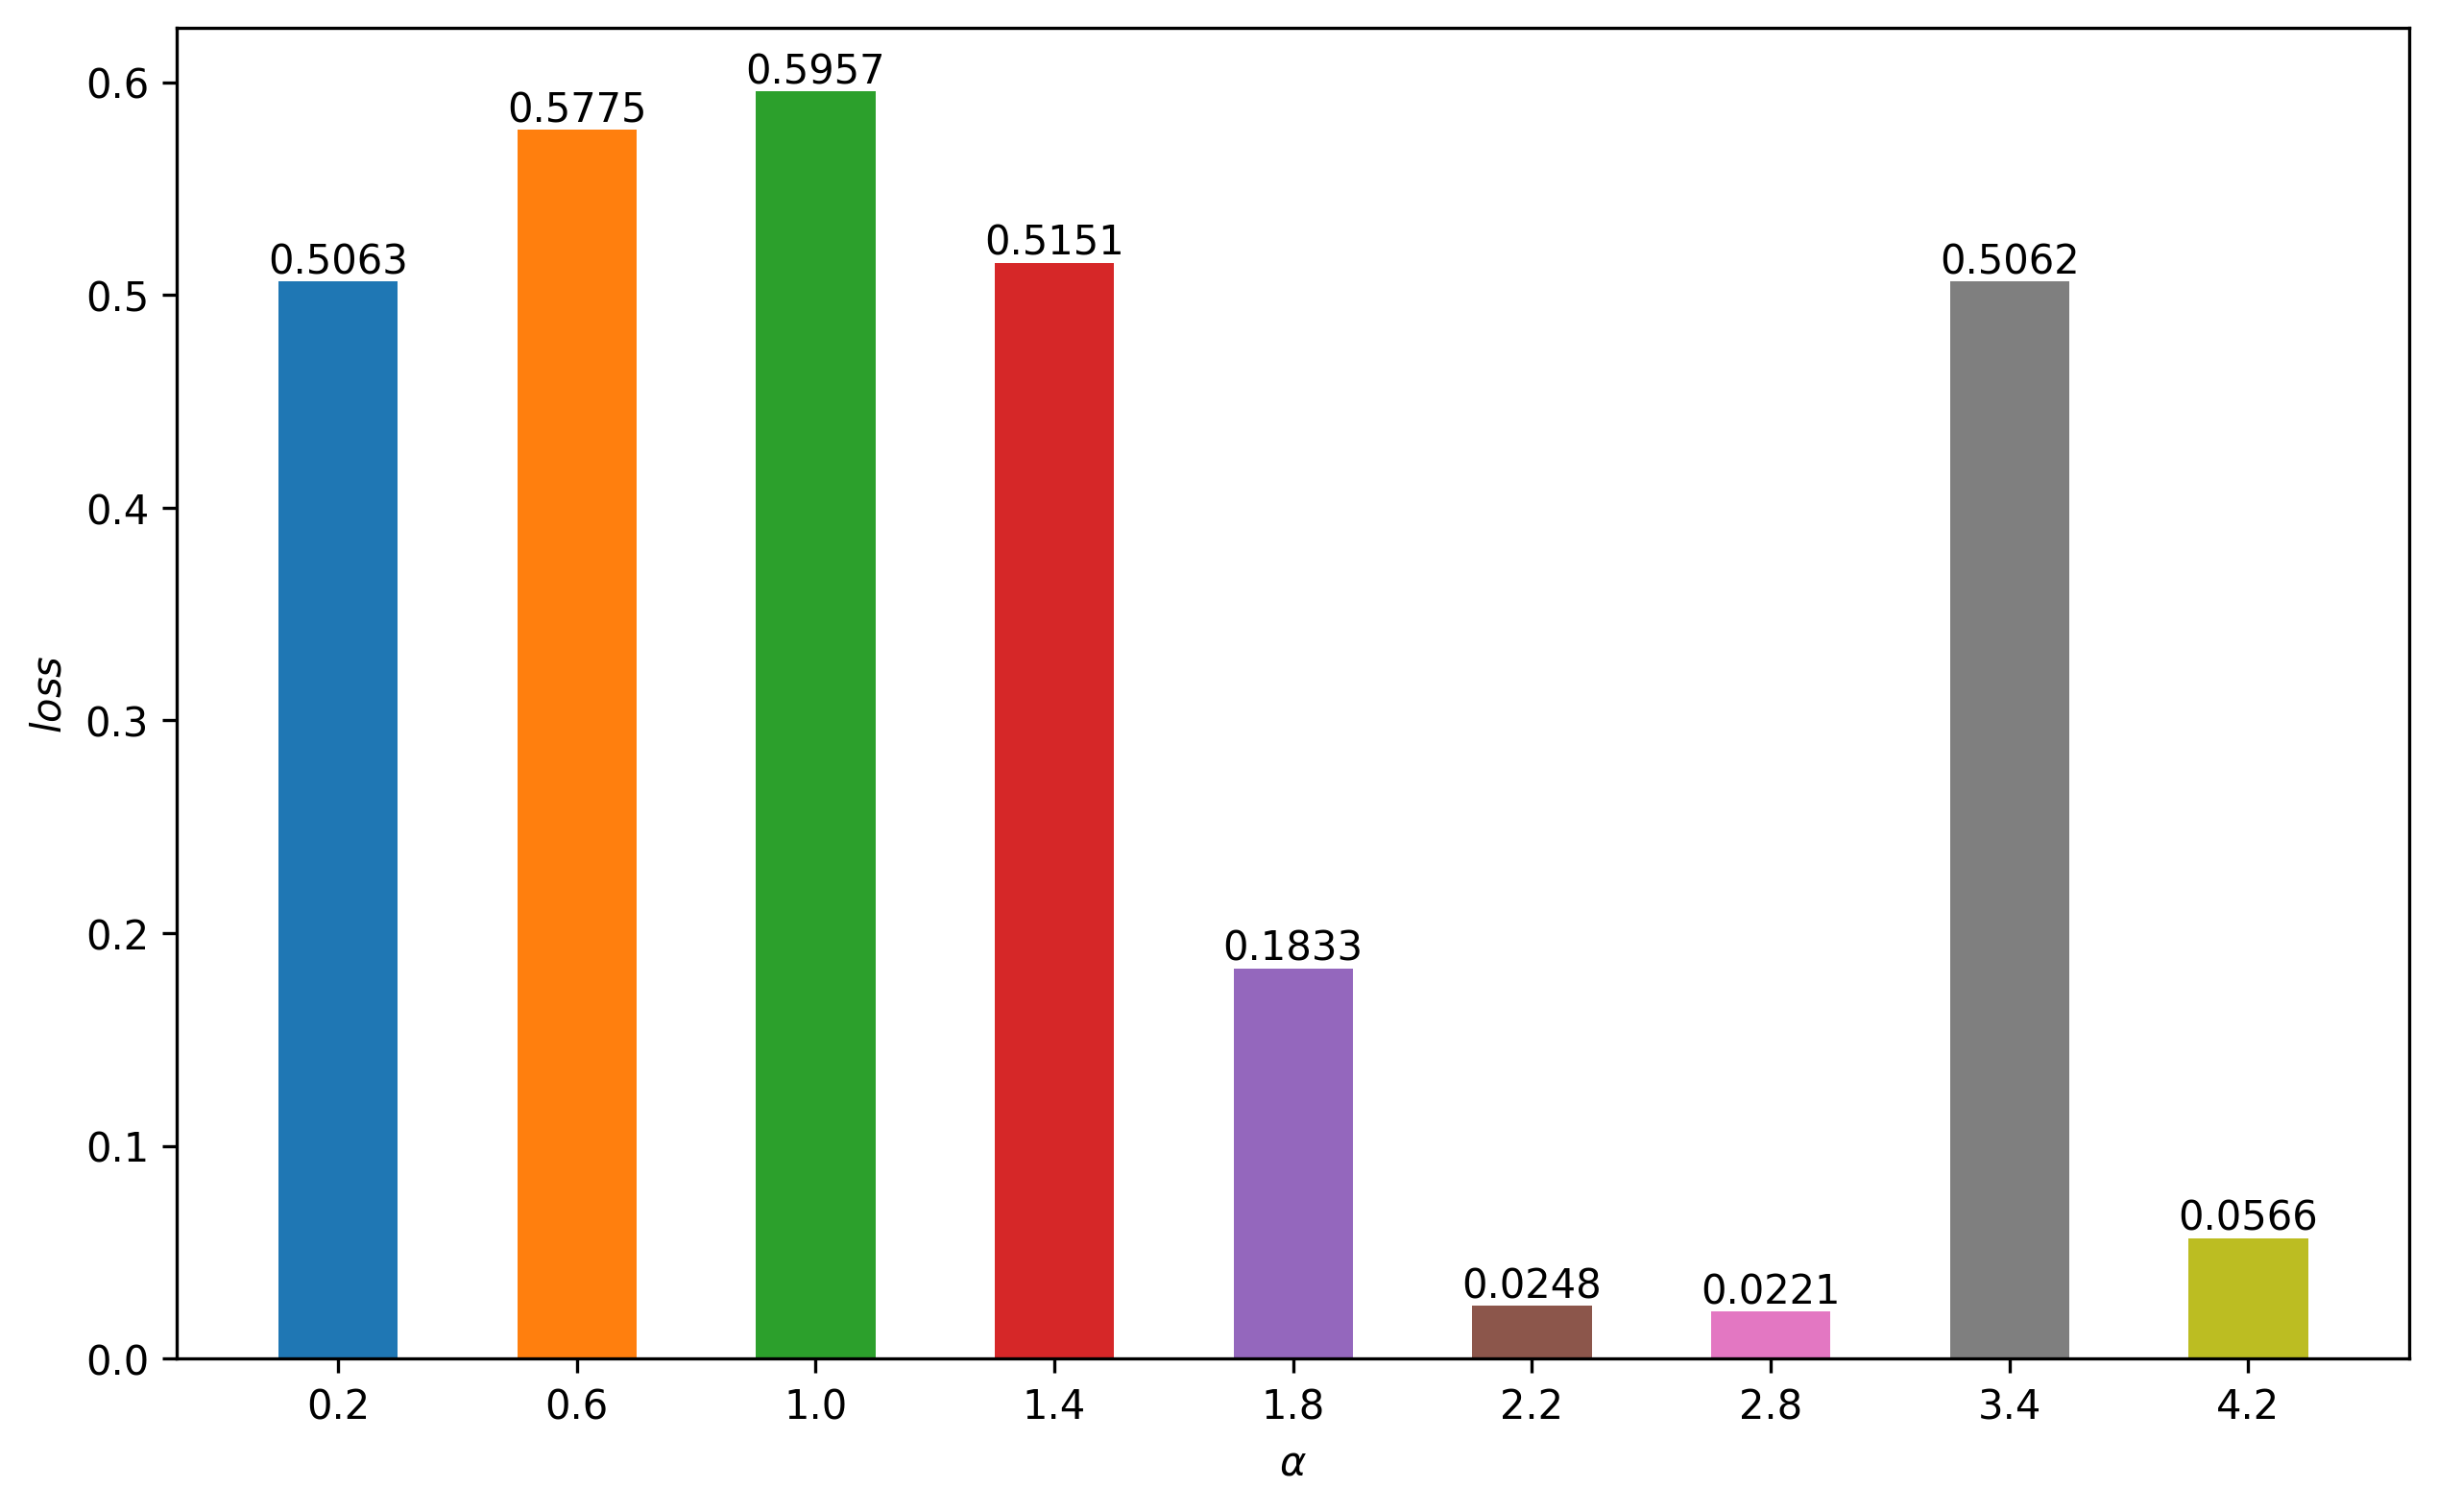

In [48]:
#fig7
fig = plt.figure(figsize=(10,6),dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'$loss$')
for i in range(len(L_x)):
    ax1.bar(i,L_y[i],width=0.5)
for x, y in enumerate(L_y):
    #print(x,y)
    ax1.text(x, y, '%s' % y, ha='center', va='bottom')
xticks = np.arange(len(L_x))
ax1.set_xticklabels(L_x)
ax1.set_xticks(xticks)

plt.savefig('picture/Fig7.eps',bbox_inches='tight',format='eps')
plt.savefig('picture/Fig7.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/Fig7.pdf',bbox_inches='tight',format='pdf')
plt.show()